# SPARK FUNDS INVESTMENT ANALYSIS

##### By: Nagaraju Brahmanapally

### Project Brief:
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

 

### Business and Data Understanding:

**Spark Funds has two minor constraints for investments:**

1. It wants to invest between **5 to 15 million USD** per round of investment

2. It wants to invest only in **English-speaking** countries because of the ease of communication with the companies it would invest in
 

#### Spark Funds Strategy:

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors. 
 

#### Spark Funds business objective:

The objective is to identify the best **sectors**, **countries**, and a suitable **investment type** for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.


#### Goals of data analysis:
1. ***Investment type analysis:** Comparing the typical investment amounts in the **venture, seed, angel, private equity etc.** so that Spark Funds can choose the type that is best suited for their strategy.
2. **Country analysis:** Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
3. **Sector analysis:** Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors'(**'Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Social, Finance, Analytics, Advertising' and 'Others'**) provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, need to map each sub-sector to its main sector.)

#### Data files:
1. __Company Details__: "companies.csv"
2. __Funding round details__: "rounds2.csv"
3. __Sector Classification__: "mapping.csv"

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data files

In [2]:
# use encoding='unicode_escape' to avoid any encoding issue
companies = pd.read_csv("./companies.csv", encoding='unicode_escape')
rounds2 = pd.read_csv("./rounds2.csv", encoding='unicode_escape')
mapping = pd.read_csv("./mapping.csv", encoding='unicode_escape')

### DATA EXPLORATION

1. __Explore companies.csv dataset__

In [3]:
# list firt 5 records
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# list last 5 records
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [5]:
# get random data of 10 records
companies.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
31973,/Organization/Lemonade-3,Takumi,http://www.takumi.com,Application Platforms|Brand Marketing|Developm...,operating,GBR,H9,London,London,01-06-2015
44162,/Organization/Plethora-Technology,Plethora Technology,http://www.enterpriseinaflash.com,Software,closed,USA,WV,WV - Other,Kearneysville,01-01-2000
17533,/Organization/Ehsmanager,EHSmanager,NaN,Health Care,closed,USA,KS,Kansas City,Overland Park,NaN
23261,/Organization/Globevestor,Globevestor,http://www.globevestor.com,Finance|Venture Capital,operating,USA,CA,SF Bay Area,San Mateo,NaN
62423,/Organization/Vivacta,Vivacta,http://www.vivacta.com,Health Care|Health Diagnostics,closed,GBR,G5,Sittingbourne,Sittingbourne,01-01-1991
33094,/Organization/Logisticare,Logisticare,NaN,NaN,operating,USA,GA,Atlanta,College Park,NaN
26567,/Organization/Iclio,iClio,http://www.iclio.net/,Apps|Content|Mobile,operating,PRT,7,PRT - Other,Coimbra,19-05-2009
38989,/Organization/Newauto-Video-Technology,NewAuto Video Technology,http://www.chinadigitalvideo.com/index.php,Games,operating,CHN,7,CHN - Other,Hubei,01-01-1990
55744,/Organization/Swish-Analytics,Swish Analytics,http://swishanalytics.com,Big Data Analytics|Fantasy Sports|Predictive A...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2014
45890,/Organization/Pumpup,PumpUp,http://pumpup.com,Apps|Fitness|Health and Wellness|Mobile|Mobile...,operating,CAN,ON,Toronto,Toronto,01-05-2012


In [6]:
# list columns of companies.csv
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [7]:
# get number of records (shape) (rows, columns)of companies dataset
companies.shape

(66368, 10)

2. __Explore rounds2.csv dataset__

In [8]:
# list firt 5 records
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
# list last 5 records
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [10]:
# get random data of 10 records
rounds2.sample(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2485,/ORGANIZATION/ADITIUM,/funding-round/00f63646347e441919fd431a236760b0,convertible_note,NaN,01-05-2014,55398.0
79206,/organization/provus-lab,/funding-round/a1d3b366bdcd3010e65e89924edec6cb,undisclosed,NaN,21-10-2013,NaN
91807,/ORGANIZATION/SOCIALDIABETES,/funding-round/91acb67251cd48c34d6e86f6910d3a77,seed,NaN,10-11-2013,200478.0
76751,/ORGANIZATION/POCKETFUNGAMES,/funding-round/07facc8eada119a760994c329ee032b5,seed,NaN,02-03-2009,NaN
72914,/organization/panel-systems,/funding-round/b3ee1e38ffe410ef3994e4a5e0b4e565,grant,NaN,23-10-2014,144702.0
63577,/ORGANIZATION/MOMENTUM-DYNAMICS-CORP,/funding-round/7516580f3d89644ef21373dd68ecca7a,venture,NaN,09-05-2011,340000.0
95258,/organization/storys-jp,/funding-round/7ff212cfc36522ca3c1fcd4ee2b98f53,venture,A,05-10-2012,321441.0
76451,/ORGANIZATION/PLC-SYSTEMS,/funding-round/9d022efcde5125a44614cc1766c353ec,debt_financing,NaN,23-02-2011,4000000.0
27498,/organization/dianwoba,/funding-round/b4e36f7e58bf1cdc3c62dfb4dfdf3578,venture,B,29-07-2014,10000000.0
33467,/ORGANIZATION/EVERYDAY-HEALTH,/funding-round/d52bd77236f482dcc3fde60d26611572,venture,B,01-11-2003,4508640.0


In [11]:
# list columns of rounds2.csv
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [12]:
# get number of records (shape) (rows, columns)of rounds2 dataset
rounds2.shape

(114949, 6)

3. __Explore mapping.csv dataset__

In [13]:
# list firt 5 records
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [14]:
# list last 5 records
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [15]:
# get random data of 10 records
mapping.sample(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
473,0tural Resources,0,0,1,0,0,0,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
228,Electronic Health Records,0,0,0,0,1,0,0,0,0
147,Content Creators,0,0,0,1,0,0,0,0,0
286,Fraud Detection,0,0,0,0,0,0,0,0,1
296,Gambling,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
384,Investment Ma0gement,0,0,0,0,0,0,0,0,1
207,Distributors,0,0,0,0,0,0,0,1,0
187,Dental,0,0,0,0,1,0,0,0,0


In [16]:
# get columns of mapping.csv
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [17]:
# get number of records (shape) (rows, columns)of rounds2 dataset
mapping.shape

(688, 10)

### DATA INSPECTION

In [18]:
# check the data type of companies columns
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [19]:
# get the statistical description(min, max, etc) of companies data
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Mightynest,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


> __<p> From above and column names, it can be observed that companies.csv dataset has only categorical values </p>__

In [20]:
# check the data type of rounds2 columns
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [21]:
# get the statistical description(min, max, etc) of rounds2 data
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


> __<p>From above and rounds2 info, it can be observed that raised_amount_usd is the numeric data which has value and is the main column on which the investment analysis is based on. </p>__

In [22]:
# check the data type of mapping columns
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [23]:
# get the statistical description(min, max, etc) of mapping data
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> __<p> From above and the data of columns (mapping.loc[:, 1:]) we can observe that all contain 0 and 1 data. This means,here row values(main sectore) are represented as columns names which need to be reduced to as row data instead of columns.</p>__

## Checkpoint 1: Data Cleaning 1

> 1. How many **unique companies** are present in **rounds2**?

In [24]:
# get the unique count of all columns in rounds2
rounds2.nunique()

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [25]:
# get the shpae of rounds2 to compare number of unique values
rounds2.shape

(114949, 6)

> From the column names of rounds2.csv, **company_permalink** is the column which represents a company name.
> There is difference in number of rows and unique values for company_permalink, which infers that there are some duplicate entries exists.

In [26]:
# check for any null/na/nan values of rounds2 dataset
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [27]:
# get company_permalink column unique value counts
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                          10
/ORGANIZATION/QUELLAN                              9
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS                9
/ORGANIZATION/EXAGEN-DIAGNOSTICS                   9
/organization/solarflare                           9
                                                  ..
/organization/shanghai-muhe-network-technology     1
/ORGANIZATION/GAME-TRUST                           1
/organization/genarts                              1
/ORGANIZATION/SMIIRL                               1
/organization/aegis-asset-backed-securities        1
Name: company_permalink, Length: 90247, dtype: int64

> <p>From above, it can be observed that the entries contain both capital and lowercase values, as python is case sensitive language, it will treat <b>"/ORGANIZATION/SOLARFLARE"</b> and <b>"/organization/solarflare"</b> as different. Hence, it is better to convert all entries to same case(upper/lower). Here, I am coverting it to lowercase.<p>

In [28]:
# convert rounds2.company_permalink to lower case
rounds2['company_permalink'] = rounds2.company_permalink.str.lower()

In [29]:
# now check unique values
rounds2.company_permalink.nunique()

66370

> Now, the unique cound of company_permalink has reduced to 66370.
> Hence, **answer** to **"<font color=red>How many unique companies are present in rounds2?</font>"** is <font color=green>__66370__ unique companies present in rounds2.csv</font>

> 2. How many __unique companies__ are present in __companies__?

In [30]:
# get the unique count of all columns in companies dataset
companies.nunique()

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [31]:
# get the shape of companies dataset
companies.shape

(66368, 10)

> From the column names of companies.csv, need to decide which column name among 'permalink' and 'name' should be treated as "unique companies" identifier.

In [32]:
# inspect 'permalink' and 'name' columns of companies dataframe
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

> From above, we can observe that 'permalink' has no null values and the number of unique values and row count for 'permalink' column are same (66368). It is good to see the values counts for 'permalink' and 'name' column to identify duplicate rows and any case senitivity.

In [33]:
# check if all column values of 'permalink' contains lower case
companies.permalink.str.islower().value_counts()

False    66368
Name: permalink, dtype: int64

> From above, It can be observed that, all values in 'permalink' has lower case.

In [34]:
# check value_counts for 'permalink' column
companies.permalink.value_counts()

/Organization/Mightynest                         1
/Organization/Safemotos                          1
/Organization/Jolancer                           1
/Organization/Whitepages-Com                     1
/Organization/Ion-Core                           1
                                                ..
/Organization/Inburst-Media                      1
/Organization/Avventa                            1
/Organization/Abaltat                            1
/Organization/International-Consumer-Products    1
/Organization/Edgeconnex                         1
Name: permalink, Length: 66368, dtype: int64

> From above, it can be observed that the 'permalink' values are all not lowercase, words start with Capital letter. Hence, it is better to convert to lower case as in case of rounds2.company_permalink column.

In [35]:
# convert companies.permalink to lower case
companies['permalink'] = companies.permalink.str.lower()

In [36]:
# agian check values counts
companies.permalink.value_counts()

/organization/inplace                          1
/organization/med-aesthetics-group             1
/organization/koollearning                     1
/organization/360learning                      1
/organization/chat-sports-inc                  1
                                              ..
/organization/pathology-holdings               1
/organization/rewind-me                        1
/organization/one-exchange-street              1
/organization/educatea                         1
/organization/aegis-asset-backed-securities    1
Name: permalink, Length: 66368, dtype: int64

In [37]:
# check value_counts for 'name' column
companies.name.value_counts()

Karma               4
Blink               4
Spire               4
#NAME?              4
Roost               4
                   ..
Skytree Digital     1
Gruppo La Patria    1
mydala              1
Codekko             1
Shaka               1
Name: name, Length: 66099, dtype: int64

> From above, it can be observed that 'name' column has duplicate values(ex: Spire repeated 4 times) and entries of 'permalink' has unique names(rowcount=uniquecount). So, it's time to check what values are present in 'permalink' column for 'name'='Spire' and decide on which column to be considered as unique.

In [38]:
# observe the records of duplicate 'name' column for any of the data. Here I am observing the entries for 'Spire' company name
companies.loc[companies['name']=='Spire']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
32264,/organization/lifekraze,Spire,http://spire.me,Apps|Corporate Wellness|Health and Wellness|Li...,operating,USA,TN,Chattanooga,Chattanooga,01-01-2010
38139,/organization/nanosatisfi,Spire,http://spire.com,Aerospace|Robotics|Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
53913,/organization/spire,Spire,NaN,Social Network Media|Web Hosting,acquired,USA,MA,Boston,Boston,NaN
53914,/organization/spire-3,Spire,http://spire.io,Android|Apps|Cloud Computing|Hardware + Softwa...,operating,USA,CA,SF Bay Area,San Francisco,24-05-2013


> From above, it can be observed that 'permalink' has unique names for each 'Spire' company name. We may consider 'permalink' as subsidairy company of 'name' column, it can also be concluded from 'category_list' that each 'permalin' entry has unique 'category_list'. For example: /Organization/Lifekraze operates in Apps category, /Organization/Nanosatisfi operates in Aerospace category and so on.

> Hence, 'permalink' can be considered as unique companies for companies.csv dataset and it's count(companies.permalink.nunique()) is the answer for "How many unique companies are present in companies?".

In [39]:
# get the unique count of permalink column to answer the question
companies.permalink.nunique()

66368

> Hence, the answer is <font color=green>__"66368"__</font> unique companies present in companies.csv

3. In the __companies__ data frame, which column can be used as the  unique key for each company? Write the __name of the column__.
> __Answer:__ As per the above analysis, "<font color=green>__permalink__</font> is the unique key for each company"

4. Are there any companies in the rounds2 file which are not  present in companies ? Answer __Y/N__.
> From the count of unique companies in companies.csv and rounds2.csv, there is a differnce of 2 companies. {rounds2 companies(66370) - companies dataset companies(66368) = 2}. But, it would be better to find those different companies and come to conclusion.

__<p>Let's find what are the companies present in rounds2 that are not in companies dataset</p>__

In [40]:
# list companies that are in rounds2 dataset but not in companies dataset
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


> From above, it can be observed that there are more than 2 companies records that are not in companies.csv but present in rounds2.csv. Hence answer to "__<font color=red>Are there any companies in the rounds2 file which are not present in companies ?</font>__" is "__<font color=green>Y</font>__"
> <br> Also, there seems to be some special characters present in 'company_permalink' column. Let's remove that special characters and find the difference.

In [41]:
# removing special characters in companies dataset
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [42]:
companies.permalink

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                   /organization/eron
66366                                 /organization/asys-2
66367    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: permalink, Length: 66368, dtype: object

In [43]:
# removing special characters in rounds2 dataset
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [44]:
rounds2.company_permalink

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                   /organization/eron
114947                                 /organization/asys-2
114948    /organization/novatiff-reklam-ve-tantm-hizmetl...
Name: company_permalink, Length: 114949, dtype: object

In [45]:
# now again list companies that are in rounds2 dataset but not in companies dataset
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [46]:
# now check the unique cound for rounds2.company_permalink column
rounds2.company_permalink.nunique()

66368

> Now after removing special characters from both datasets, there are no difference in number of unique companies in rounds2 and companies.

5. Merge the two data frames so that all variables (columns) in the __companies__ frame are added to the __rounds2__ data frame. Name the merged frame __master_frame__. How many observations are present in __master_frame__?

> Before merging the two dataframes (companies and rounds2), it is good to see any missing values on the merging column and impute/remove if exists.

In [47]:
# find the missing value count in companies data frame
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [48]:
# find the missing value count in rounds2 data frame
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

> As the mergin is going to be on 'permalink' column of companies DF, and 'company_permalin' column of rounds2 DF, observe missing count fo these columns. From above, it can be seen that both columns have '0' missing values, hence we can proceed with merging.

In [49]:
# merging companies and rounds2 df
master_frame = pd.merge(rounds2, companies, how='left', left_on='company_permalink', right_on='permalink')

In [50]:
# list first 5 rows
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [51]:
# shape of master_frame
master_frame.shape

(114949, 16)

> From the shape of master_frame, it can be observed that, there are __114949__ observations present in master_frame. So, answer for "<font color=red>__Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?__</font>" is <font color=green>"__114949__"</font>

> 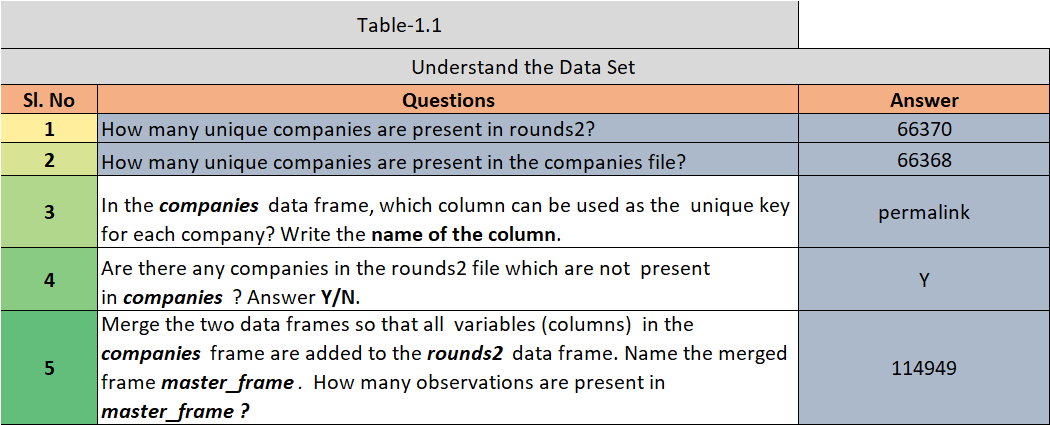

In [52]:
# get the master_frame information
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

## Checkpoint 2: Funding Type Analysis

### Data cleaning and analysis

In [53]:
# remove columns that are not required for analysis
# list the master_frame columns
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

> Among the master_frame columns, 
> > 'company_permalink' and 'permalink' are redundant. So remove 'permalink' column

In [54]:
# drop 'permalink' column which is redundant
master_frame.drop(columns='permalink', inplace=True)

In [55]:
# check number of columns again
master_frame.shape

(114949, 15)

In [56]:
# Also find null values in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

> There some more columns which are not required for analysis, they are: 'funding_round_permalink', 'funding_round_code', 'funded_at', 'name', 'homepage_url', 'status', 'state_code', 'region', 'city', 'founded_at'

In [57]:
# drop columns that are not required
columns_not_required = ['funding_round_permalink', 'funding_round_code', 'funded_at', 'name', 'homepage_url', 'status', 'state_code', 'region', 'city', 'founded_at']
master_frame.drop(columns=columns_not_required, inplace=True)

In [58]:
# check master_frame shape
master_frame.shape

(114949, 5)

In [59]:
# check head values
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
1,/organization/-qounter,venture,NaN,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN


<p> Now we have required columns ['company_permalink', 'funding_round_type', 'raised_amount_usd', 'category_list', 'country_code'], now check for any missing values.</p>

In [60]:
# check for missing values
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
category_list          3410
country_code           8678
dtype: int64

In [61]:
# check for the percentage of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
category_list          2.97
country_code           7.55
dtype: float64

In [62]:
# get statistical information for master_frame
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


<p> Here main column is "<b>raised_amount_usd</b>" which has investments made in USD, there are around 17.39% of missing values for this column. From stastical distribution of 'raised_amount_usd', it can be observed that there is a significant difference in minimum and 25%(percentile), signigicant difference between 75% and max values which may result in outliers. Hence it is better to <b>drop</b> those missing values. Also, missing value percentage is considerably low.</p>

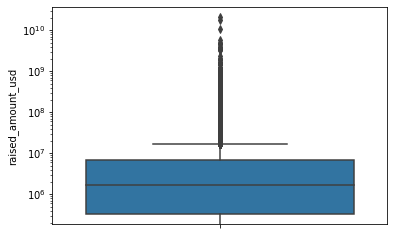

In [63]:
# plot boxplot to see for any outliers
sns.boxplot(y=master_frame.raised_amount_usd)
plt.yscale('log')
plt.show()

<p> It is clear from the box plot that there are many oupliers present, but we cannot impute missing values of column 'raised_amount_usd' wiht median or mean values</p>

In [64]:
# check shape of master_frame before dropping missing values
master_frame.shape

(114949, 5)

In [65]:
# dropping missing values for 'raised_amound_usd' column
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [66]:
# check shape after dropping missing values
master_frame.shape

(94959, 5)

In [67]:
# now again check for any missing values
master_frame.isnull().sum()

company_permalink        0
funding_round_type       0
raised_amount_usd        0
category_list         1044
country_code          5851
dtype: int64

In [68]:
# check for the percentage of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
category_list         1.10
country_code          6.16
dtype: float64

<p>Now, the missing percentage for 'category_list' and 'country_code' reduced. Let's remove even these missing values as they are very less percentage of missing values.</p>

In [69]:
# dropping missing values of 'category_list' and 'country_code' columns
master_frame = master_frame[~(master_frame['category_list'].isnull() | master_frame['country_code'].isnull())]

In [70]:
# check shape of master_frame
master_frame.shape

(88529, 5)

In [71]:
# check for the percentage of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
category_list         0.0
country_code          0.0
dtype: float64

<p> Now the data has no missing values.</p>

In [72]:
master_frame.describe()

,raised_amount_usd
count,8.852900e+04
mean,1.047385e+07
std,1.118118e+08
min,0.000000e+00
25%,3.705180e+05
50%,1.800000e+06
75%,7.100000e+06
max,2.127194e+10


In [73]:
# unique types of funding_round_type
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

As, Spark Funds wants to choose one of the investment types among __['venture', 'angel', 'seed', 'private_equity']__ for each potential investment they will make, so filter master_frame with these funding_round_type.

In [74]:
# filtering master_fram with required funding_round_type
required_funding_round_type = ['venture', 'angel', 'seed', 'private_equity']
master_frame = master_frame[master_frame.funding_round_type.isin(required_funding_round_type)]

In [75]:
# get master_frame sample data
master_frame.sample(10)

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
45590,/organization/i-want-it-now,seed,500000.0,Apps|Mobile,USA
67736,/organization/nexterra,venture,2500000.0,Clean Technology,CAN
80726,/organization/qunano,venture,438000.0,Nanotechnology,SWE
47115,/organization/incinerator-studios,angel,1250000.0,Android|Games|iPad|iPhone|Mobile|Technology,USA
5054,/organization/amalfi-semiconductor,venture,12000000.0,Semiconductors,USA
51550,/organization/joy-media-group,venture,20000000.0,News,CHN
113659,/organization/zazuba,seed,150000.0,Small and Medium Businesses|Software,USA
61531,/organization/miartech-shanghai,venture,7800000.0,Hardware|Semiconductors,CHN
14590,/organization/braincells,venture,3999996.0,Biotechnology,USA
64458,/organization/msi-methylation-sciences,venture,19783.0,Biotechnology,CAN


<P>Now, master_frame contains only required funding_round_type data, lets find the <b>most representative value of the investment amount</b> or each of the four funding types (venture, angel, seed, and private equity)</P>

In [76]:
master_frame.describe()

,raised_amount_usd
count,7.512400e+04
mean,9.519475e+06
std,7.792778e+07
min,0.000000e+00
25%,4.705852e+05
50%,2.000000e+06
75%,8.000000e+06
max,1.760000e+10


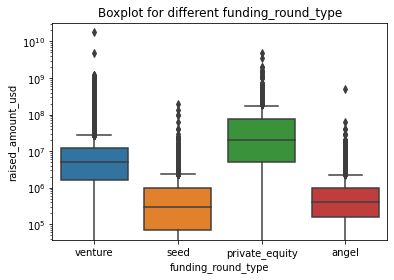

In [77]:
# lets plot a boxplot to see the spread of raised_amount_usd values across different funding_round_type
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.title("Boxplot for different funding_round_type")
plt.show()

> From above boxplot, it can be observed that, there are many outliers and hence "mean" won't be a good option to choose as representative value, So, in this case __MEDIAN__ would be the best option to choose as **most representative value** for the investment amount

In [78]:
# get the value counts of each funding_round_type
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [79]:
# group by funding_round_type and get the median value which is representative values of the investment amount
master_frame.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

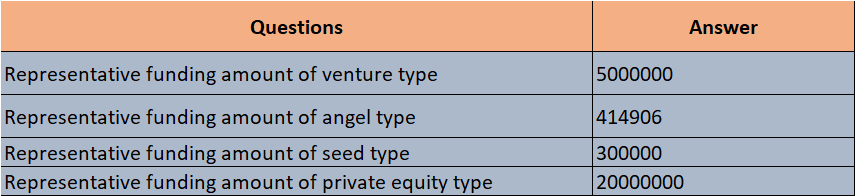

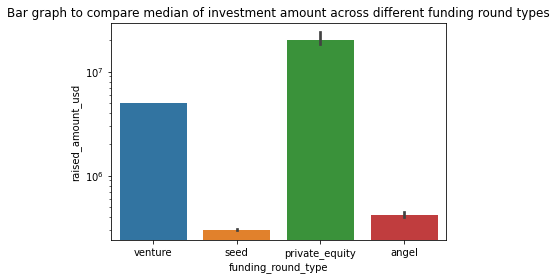

In [80]:
# just for analysis: Bar graph to compare median of investment amount across different funding round types
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.yscale('log')
plt.title("Bar graph to compare median of investment amount across different funding round types")
plt.show()

In [81]:
# Normalize median values to Million usd
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].median()/1000000,2)

funding_round_type
angel              0.41
private_equity    20.00
seed               0.30
venture            5.00
Name: raised_amount_usd, dtype: float64

> <font color=red>Considering that Spark Funds wants to invest between __5 to 15 million USD__ per investment round, which investment type is the most suitable for it?</font>
>> Answer: From above Median distribution of funding_round_type, only '<font color=green>__VENTURE__</font>' type is falling in the range of Spark Funds investment amount.

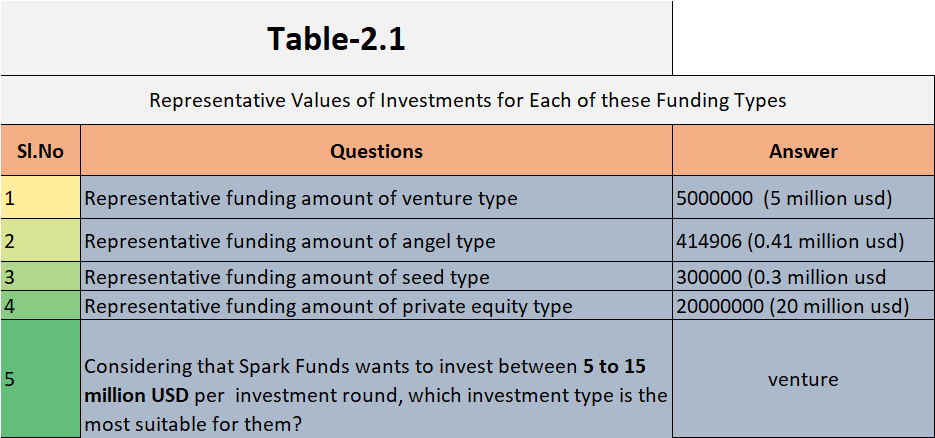

## Checkpoint 3: Country Analysis

> 1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

> 2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [82]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Biotechnology,CAN


In [83]:
# listing countries with total investment amount in descending order
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    5.084739e+11
CHN    6.100092e+10
GBR    2.689981e+10
IND    2.104911e+10
CAN    1.316891e+10
           ...     
GEO    3.000000e+04
ZWE    3.000000e+04
PRY    2.500000e+04
PSE    2.000000e+04
HND    4.500000e+03
Name: raised_amount_usd, Length: 131, dtype: float64

In [84]:
# Normalizing tatal values to Million dollars
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)/1000000

country_code
USA    508473.934940
CHN     61000.915923
GBR     26899.805686
IND     21049.113815
CAN     13168.914172
           ...      
GEO         0.030000
ZWE         0.030000
PRY         0.025000
PSE         0.020000
HND         0.004500
Name: raised_amount_usd, Length: 131, dtype: float64

In [85]:
# store top 9 total investment countries in top9 variable
top9_countries = master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[:9].index
top9_countries

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'DEU', 'ISR', 'FRA', 'NLD'], dtype='object', name='country_code')

In [86]:
# DF having data of top9 countries
top9 = master_frame[master_frame.country_code.isin(top9_countries)]
top9.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Biotechnology,CAN


In [87]:
# check if top9 DF has top9 countries
dftop9conutries = list(top9.country_code.unique())
dftop9conutries.sort()
print(dftop9conutries)
top9countries = list(top9_countries)
top9countries.sort()
print(top9countries)
print(top9countries == dftop9conutries)

['CAN', 'CHN', 'DEU', 'FRA', 'GBR', 'IND', 'ISR', 'NLD', 'USA']
['CAN', 'CHN', 'DEU', 'FRA', 'GBR', 'IND', 'ISR', 'NLD', 'USA']
True


> Identify the __top three English-speaking__ countries in the data frame top9.
>> Ans: Among top9 countries top 3 English-speaking countries are __"USA", "GBR"__ and __"IND"__
>> 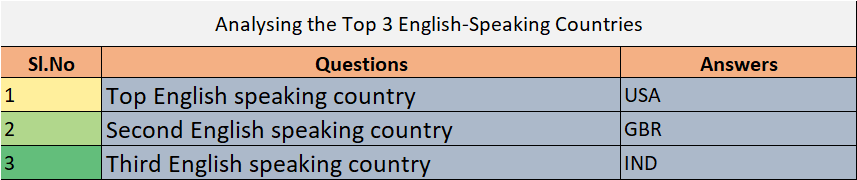

In [88]:
# Filtering master data frame for top 3 engilish speakin countries
master_frame = master_frame[(master_frame.country_code == 'USA') | (master_frame.country_code == 'GBR') | (master_frame.country_code == 'IND')]
master_frame

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
9,/organization/0xdata,seed,3000000.0,Analytics,USA
10,/organization/0xdata,venture,20000000.0,Analytics,USA
11,/organization/0xdata,venture,1700000.0,Analytics,USA
...,...,...,...,...,...
114935,/organization/zyrra,angel,875000.0,E-Commerce,USA
114936,/organization/zystor,venture,8500000.0,Biotechnology,USA
114939,/organization/zzish,angel,400000.0,Analytics|Android|Developer APIs|Education|Gam...,GBR
114940,/organization/zzish,seed,320000.0,Analytics|Android|Developer APIs|Education|Gam...,GBR


## Checkpoint 4: Sector Analysis 1

<p> When we say sector analysis, we refer to one of the eight main sectors (named <b>main_sector</b>) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’. </p>

> 'category_list' column has multiple sectore sperated by pipe(|), so to finalize on one category type (sectory type), you discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector.For examplae in "Application Platforms|Real Time|Social Network...	" category_list, first string ie. 'Application Platforma' is the primary sector

In [89]:
# get primary sector from category_list column
master_frame.category_list = master_frame.category_list.apply(lambda x: x.split('|')[0])

In [90]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
2,/organization/-qounter,seed,700000.0,Application Platforms,USA
9,/organization/0xdata,seed,3000000.0,Analytics,USA
10,/organization/0xdata,venture,20000000.0,Analytics,USA
11,/organization/0xdata,venture,1700000.0,Analytics,USA


In [91]:
# inspect mapping file again
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [92]:
# check for any null values
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [93]:
mapping.shape

(688, 10)

In [94]:
# category_list has one null value, check what it is
mapping[mapping.category_list.isnull()]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


In [95]:
# Remove that NaN entry for which category_list is null
mapping = mapping[~mapping.category_list.isnull()]

In [96]:
mapping.shape

(687, 10)

In [97]:
# check again for any null values
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [98]:
# now the mapping data don't have any null values
# there are 10 columns in mapping among which one cloumn 'Blanks' is redundant, hence drop that column
mapping.drop(columns='Blanks', inplace=True)

In [99]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [100]:
mapping.nunique()

category_list                              687
Automotive & Sports                          2
Cleantech / Semiconductors                   2
Entertainment                                2
Health                                       2
Manufacturing                                2
News, Search and Messaging                   2
Others                                       2
Social, Finance, Analytics, Advertising      2
dtype: int64

In [101]:
mapping.columns[1:]

Index(['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment',
       'Health', 'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [102]:
# convert the wide format to long format
mapping = mapping.melt(id_vars="category_list", value_vars=mapping.columns[1:], var_name="main_sector")
mapping

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
5491,Wholesale,"Social, Finance, Analytics, Advertising",0
5492,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5493,Wireless,"Social, Finance, Analytics, Advertising",0
5494,Women,"Social, Finance, Analytics, Advertising",0


In [103]:
# consider only rows whose value=1 
mapping = mapping[mapping.value ==1]
mapping

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5426,Social Television,"Social, Finance, Analytics, Advertising",1
5427,Social Travel,"Social, Finance, Analytics, Advertising",1
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [104]:
# drop the value column which is redundant
mapping.drop(columns='value', inplace=True)

C:\Users\Nagaraju_Brahmanapal\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [105]:
mapping

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising"
5426,Social Television,"Social, Finance, Analytics, Advertising"
5427,Social Travel,"Social, Finance, Analytics, Advertising"
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [106]:
# now merge this mapping DF with master_frame to add main_sector column
master_frame = master_frame.merge(mapping, how='left', on='category_list')
master_frame

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code,main_sector
0,/organization/-fame,venture,10000000.0,Media,IND,Entertainment
1,/organization/-qounter,seed,700000.0,Application Platforms,USA,"News, Search and Messaging"
2,/organization/0xdata,seed,3000000.0,Analytics,USA,NaN
3,/organization/0xdata,venture,20000000.0,Analytics,USA,NaN
4,/organization/0xdata,venture,1700000.0,Analytics,USA,NaN
...,...,...,...,...,...,...
57185,/organization/zyrra,angel,875000.0,E-Commerce,USA,Others
57186,/organization/zystor,venture,8500000.0,Biotechnology,USA,Cleantech / Semiconductors
57187,/organization/zzish,angel,400000.0,Analytics,GBR,NaN
57188,/organization/zzish,seed,320000.0,Analytics,GBR,NaN


In [107]:
# seems like there are some NaN values in main_sector column
# check null values
master_frame.isnull().sum()

company_permalink        0
funding_round_type       0
raised_amount_usd        0
category_list            0
country_code             0
main_sector           4322
dtype: int64

In [108]:
# there are 4322 null values for main_sector column
# let's see how much percentage it is and decide whether to drop null values
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
category_list         0.00
country_code          0.00
main_sector           7.56
dtype: float64

In [109]:
# as it is only 7.56% of total master_frame data, null value rows can be dropped
# consider rows that don't have null values
master_frame = master_frame[~master_frame.main_sector.isnull()]

In [110]:
master_frame

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code,main_sector
0,/organization/-fame,venture,10000000.0,Media,IND,Entertainment
1,/organization/-qounter,seed,700000.0,Application Platforms,USA,"News, Search and Messaging"
6,/organization/1,seed,150000.0,Mobile,USA,"News, Search and Messaging"
7,/organization/1,seed,1000050.0,Mobile,USA,"News, Search and Messaging"
8,/organization/1-800-publicrelations-inc-,private_equity,6000000.0,Internet Marketing,USA,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...
57183,/organization/zyrra,seed,50000.0,E-Commerce,USA,Others
57184,/organization/zyrra,venture,140500.0,E-Commerce,USA,Others
57185,/organization/zyrra,angel,875000.0,E-Commerce,USA,Others
57186,/organization/zystor,venture,8500000.0,Biotechnology,USA,Cleantech / Semiconductors


In [111]:
# check again for null values
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
category_list         0
country_code          0
main_sector           0
dtype: int64

## Checkpoint 5: Sector Analysis 2

> Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

>Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [112]:
# get min/max and other details of master_fram in terms of Millions
master_frame.describe()/1000000

,raised_amount_usd
count,0.052868
mean,9.824149
std,86.602897
min,0.000000
25%,0.525000
50%,2.500000
75%,9.000000
max,17600.000000


In [113]:
# Store 'USA' country related information in D1 according to the condigiton
D1 = master_frame[(master_frame.country_code=='USA') & 
                  (master_frame.raised_amount_usd>=5000000) & 
                  (master_frame.raised_amount_usd<=15000000)]

In [114]:
D1

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code,main_sector
8,/organization/1-800-publicrelations-inc-,private_equity,6000000.0,Internet Marketing,USA,"Social, Finance, Analytics, Advertising"
9,/organization/1-mainstream,venture,5000000.0,Apps,USA,"News, Search and Messaging"
36,/organization/128-technology,venture,11999347.0,Service Providers,USA,Others
39,/organization/1366-technologies,venture,15000000.0,Manufacturing,USA,Manufacturing
40,/organization/1366-technologies,venture,5000000.0,Manufacturing,USA,Manufacturing
...,...,...,...,...,...,...
57167,/organization/zynga,venture,15000000.0,Facebook Applications,USA,"Social, Finance, Analytics, Advertising"
57170,/organization/zynga,venture,5026000.0,Facebook Applications,USA,"Social, Finance, Analytics, Advertising"
57176,/organization/zyomyx-inc,venture,12000000.0,Biotechnology,USA,Cleantech / Semiconductors
57177,/organization/zyomyx-inc,venture,14219999.0,Biotechnology,USA,Cleantech / Semiconductors


In [115]:
D1.describe()/1000000

,raised_amount_usd
count,0.011577
mean,8.917167
std,3.080790
min,5.000000
25%,6.000000
50%,8.273297
75%,11.000000
max,15.000000


In [116]:
# Store 'GBR' country related information in D2 according to the condigiton
D2 = master_frame[(master_frame.country_code=='GBR') & 
                  (master_frame.raised_amount_usd>=5000000) & 
                  (master_frame.raised_amount_usd<=15000000)]
D2

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code,main_sector
164,/organization/365scores,venture,5500000.0,Android,GBR,"Social, Finance, Analytics, Advertising"
306,/organization/5app,seed,5100000.0,Mobile,GBR,"News, Search and Messaging"
353,/organization/7digital,venture,8468328.0,Content Creators,GBR,Entertainment
354,/organization/7digital,venture,10000000.0,Content Creators,GBR,Entertainment
390,/organization/90min,venture,15000000.0,Media,GBR,Entertainment
...,...,...,...,...,...,...
56747,/organization/zeus,venture,5100000.0,Software,GBR,Others
56755,/organization/ziarco-pharma,venture,6000000.0,Biotechnology,GBR,Cleantech / Semiconductors
56836,/organization/zinwave,venture,9961962.0,Mobile,GBR,"News, Search and Messaging"
56837,/organization/zinwave,venture,7640000.0,Mobile,GBR,"News, Search and Messaging"


In [117]:
D2.describe()/1000000

,raised_amount_usd
count,0.000607
mean,8.690942
std,2.873574
min,5.000000
25%,6.072303
50%,8.000000
75%,10.725883
max,15.000000


In [118]:
# Store 'IND' country related information in D3 according to the condigiton
D3 = master_frame[(master_frame.country_code=='IND') & 
                  (master_frame.raised_amount_usd>=5000000) & 
                  (master_frame.raised_amount_usd<=15000000)]
D3

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code,main_sector
0,/organization/-fame,venture,10000000.0,Media,IND,Entertainment
91,/organization/21diamonds-india,venture,6369507.0,E-Commerce,IND,Others
1263,/organization/adlabs-imagica,venture,8180000.0,Entertainment,IND,Entertainment
2083,/organization/akosha,venture,5000000.0,Consumer Internet,IND,"Social, Finance, Analytics, Advertising"
2600,/organization/amagi-media-labs,venture,5500000.0,Advertising,IND,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...
56939,/organization/zomato,venture,10000000.0,Content Discovery,IND,Entertainment
56971,/organization/zoomcar-india,venture,8000000.0,Automotive,IND,Automotive & Sports
56972,/organization/zoomcar-india,venture,11000000.0,Automotive,IND,Automotive & Sports
56987,/organization/zoomo,venture,5000000.0,Internet,IND,"News, Search and Messaging"


In [119]:
D3.describe()/1000000

,raised_amount_usd
count,0.000309
mean,8.938956
std,3.179862
min,5.000000
25%,6.000000
50%,8.750000
75%,10.300000
max,15.000000


In [120]:
# Total number of investments (count) for 'USA'(Country1)
D1.raised_amount_usd.count()

11577

In [121]:
# Total number of investments (count) for 'GBR'(Country2)
D2.raised_amount_usd.count()

607

In [122]:
# Total number of investments (count) for 'IND'(Country3)
D3.raised_amount_usd.count()

309

In [123]:
#  Total amount of investment (USD) for 'USA' (Country1)
D1.raised_amount_usd.sum()

103234038689.0

In [124]:
#  Total amount of investment (USD) for 'GBR' (Country2)
D2.raised_amount_usd.sum()

5275401698.0

In [125]:
#  Total amount of investment (USD) for 'IND' (Country3)
D3.raised_amount_usd.sum()

2762137552.0

> calculate the __total number of investments__ and the __total amount of investments__ in each main sector for each of the three countries.

In [126]:
# calculating the total number of investments in each main sector for 'USA'
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     3014
Cleantech / Semiconductors                 2408
Social, Finance, Analytics, Advertising    1979
News, Search and Messaging                 1614
Health                                      964
Manufacturing                               822
Entertainment                               598
Automotive & Sports                         178
Name: raised_amount_usd, dtype: int64

> Top sector (based on count of investments) for 'USA' (Country1)
>> Ans: __Others__

> Second-best sector (based on count of investments) for 'USA' (Country1)
>> Ans: __Cleantech / Semiconductors__

> Third-best sector (based on count of investments) for 'USA' (Country1)
>> Ans: __Social, Finance, Analytics, Advertising__

> Number of investments in the top sector for 'USA' (Country1)
>> Ans: __3014__

> Number of investments in the second-best sector for 'USA' (Country1)
>> Ans: __2408__

> Number of investments in the third-best sector for 'USA' (Country1)
>> Ans: __1979__

In [127]:
# For the top sector count-wise, which company received the highest investment for 'USA'?
D1[D1.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/virtustream                      64300000.0
/organization/capella                          54968051.0
/organization/airtight-networks                54201907.0
/organization/decarta                          52100000.0
/organization/deliveryagent                    51538337.0
                                                  ...    
/organization/united-needs                      5000000.0
/organization/fredericks-of-hollywood-group     5000000.0
/organization/fuego                             5000000.0
/organization/g2-switchworks                    5000000.0
/organization/netqos                            5000000.0
Name: raised_amount_usd, Length: 2088, dtype: float64

> For the top sector count-wise, which company received the highest investment for 'USA'?
>> Ans: __'/organization/virtustream'__

In [128]:
# For the second-best sector count-wise, which company received the highest investment for 'USA'?
D1[D1.main_sector=='Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/biodesix                   75300000.0
/organization/tigo-energy                68739496.0
/organization/irhythm                    62680000.0
/organization/forsight-labs              61300001.0
/organization/rheonix                    56124758.0
                                            ...    
/organization/medifacts-international     5000000.0
/organization/terapio                     5000000.0
/organization/alere-analytics             5000000.0
/organization/microvi-biotechnologies     5000000.0
/organization/1bog                        5000000.0
Name: raised_amount_usd, Length: 1645, dtype: float64

> For the second-best sector count-wise, which company received the highest investment for 'USA'?
>> Ans: __/organization/biodesix__

In [129]:
# calculating the total amount of investments in Million Dollars in each main sector for 'USA'
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)/1000000

main_sector
Others                                     26869.001443
Cleantech / Semiconductors                 22213.279446
Social, Finance, Analytics, Advertising    17182.484847
News, Search and Messaging                 14171.619470
Health                                      8659.415735
Manufacturing                               7453.792922
Entertainment                               5138.922970
Automotive & Sports                         1545.521856
Name: raised_amount_usd, dtype: float64

In [130]:
# calculating the total number of investments in each main sector for 'GBR'
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     149
Cleantech / Semiconductors                 130
Social, Finance, Analytics, Advertising    103
News, Search and Messaging                  82
Entertainment                               55
Manufacturing                               45
Health                                      26
Automotive & Sports                         17
Name: raised_amount_usd, dtype: int64

> Top sector (based on count of investments) for 'GBR' (Country2)
>> Ans: __Others__

> Second-best sector (based on count of investments) for 'GBR' (Country2)
>> Ans: __Cleantech / Semiconductors__

> Third-best sector (based on count of investments) for 'GBR' (Country2)
>> Ans: __Social, Finance, Analytics, Advertising__

> Number of investments in the top sector for 'GBR' (Country2)
>> Ans: __149__

> Number of investments in the second-best sector for 'GBR' (Country2)
>> Ans: __130__

> Number of investments in the third-best sector for 'GBR' (Country2)
>> Ans: __103__

In [131]:
# For the top sector count-wise, which company received the highest investment for 'GBR'?
D2[D2.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/enigmatic                  32500000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
                                            ...    
/organization/refme                       5000000.0
/organization/photobox                    5000000.0
/organization/vector-watch                5000000.0
/organization/udex                        5000000.0
/organization/parcelgenie                 5000000.0
Name: raised_amount_usd, Length: 121, dtype: float64

> For the top sector count-wise, which company received the highest investment for 'GBR'?
>> Ans: __/organization/electric-cloud__

In [132]:
# For the second-best sector count-wise, which company received the highest investment for 'GBR'?
D2[D2.main_sector=='Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/eusa-pharma                                                      35600000.0
/organization/horizon-discovery                                                31353719.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/elixent                                                          25000000.0
/organization/takeda-cambridge                                                 22340000.0
                                                                                  ...    
/organization/lamellar-biomedical                                               5301059.0
/organization/mmic-solutions                                                    5250000.0
/organization/flowline                                                          5104587.0
/organization/ignis-energy                                                      5014644.0
/organization/exco-intouch                                                      50

> For the second-best sector count-wise, which company received the highest investment for 'GBR'?
>> Ans: __/organization/eusa-pharma__

In [133]:
# calculating the total amount of investments in Million Dollars in each main sector for 'GBR'
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)/1000000

main_sector
Others                                     1298.444436
Cleantech / Semiconductors                 1162.339160
Social, Finance, Analytics, Advertising     868.861562
News, Search and Messaging                  673.988167
Entertainment                               475.148321
Manufacturing                               391.969972
Health                                      231.537510
Automotive & Sports                         173.112570
Name: raised_amount_usd, dtype: float64

In [134]:
# calculating the total number of investments in each main sector for 'IND'
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     113
News, Search and Messaging                  53
Social, Finance, Analytics, Advertising     34
Entertainment                               34
Manufacturing                               21
Cleantech / Semiconductors                  21
Health                                      20
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

> Top sector (based on count of investments) for 'IND' (Country3)
>> Ans: __Others__

> Second-best sector (based on count of investments) for 'IND' (Country3)
>> Ans: __News, Search and Messaging__

> Third-best sector (based on count of investments) for 'IND' (Country3)
>> Ans: __Social, Finance, Analytics, Advertising__

> Number of investments in the top sector for 'IND' (Country3)
>> Ans: __113__

> Number of investments in the second-best sector for 'IND' (Country3)
>> Ans: __53__

> Number of investments in the third-best sector for 'IND' (Country3)
>> Ans: __34__

In [135]:
# For the top sector count-wise, which company received the highest investment for 'IND'?
D3[D3.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/firstcry-com           39000000.0
/organization/myntra                 38000000.0
/organization/commonfloor            32900000.0
/organization/pepperfry-com          28000000.0
/organization/itzcash-card-ltd       25000000.0
                                        ...    
/organization/tastykhana              5000000.0
/organization/reznext                 5000000.0
/organization/voonik-com              5000000.0
/organization/vedantu-innovations     5000000.0
/organization/vriti-infocom           5000000.0
Name: raised_amount_usd, Length: 90, dtype: float64

> For the top sector count-wise, which company received the highest investment for 'IND'?
>> Ans: __/organization/firstcry-com__

In [136]:
# For the second-best sector count-wise, which company received the highest investment for 'IND'?
D3[D3.main_sector=='News, Search and Messaging'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/hike                                21000000.0
/organization/roadrunnr                           21000000.0
/organization/matrimony-com                       20400000.0
/organization/mobile2win-india                    15000000.0
/organization/bluestone-com                       15000000.0
/organization/guruji                              15000000.0
/organization/quikr-india                         14000000.0
/organization/bharat-matrimony                    11750000.0
/organization/teledna                             10490000.0
/organization/one97-communications                10000000.0
/organization/fourinteractive                     10000000.0
/organization/just-dial                           10000000.0
/organization/money-on-mobile                     10000000.0
/organ

> For the second-best sector count-wise, which company received the highest investment for 'IND'?
>> Ans: __/organization/gupshup-technology-india-pvt-ltd__

In [137]:
# calculating the total amount of investments in Million Dollars in each main sector for 'IND'
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)/1000000

main_sector
Others                                     1039.909507
News, Search and Messaging                  439.834545
Social, Finance, Analytics, Advertising     303.043500
Entertainment                               293.830000
Manufacturing                               200.900000
Cleantech / Semiconductors                  173.980000
Health                                      173.740000
Automotive & Sports                         136.900000
Name: raised_amount_usd, dtype: float64

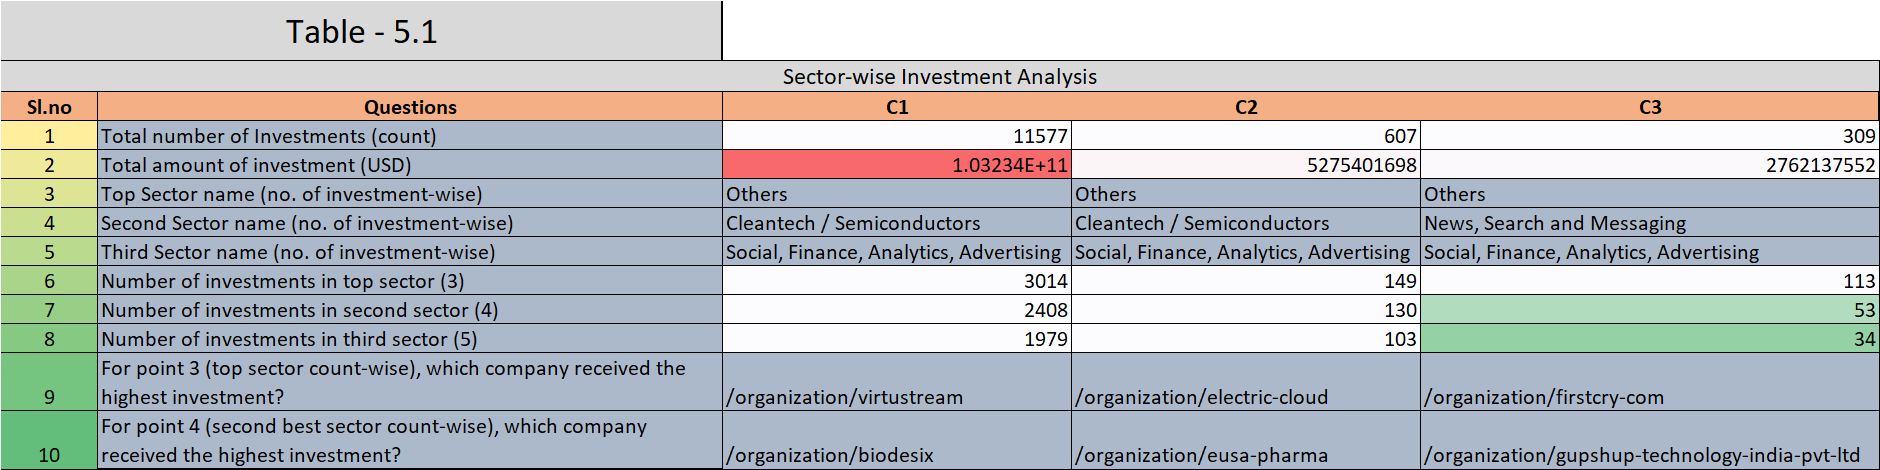

## Checkpoint 6: Plots

> 1. A plot showing __the representative amount of investment__ in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [138]:
master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,500000.0
private_equity,20000000.0
seed,400000.0
venture,5000000.0


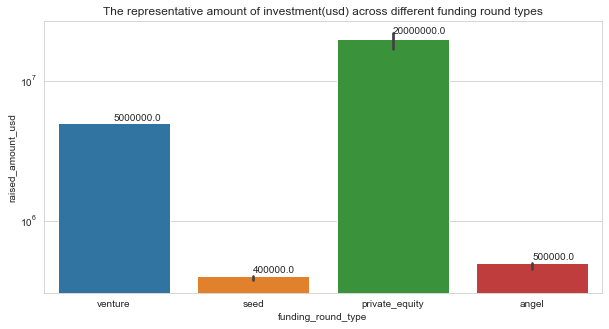

In [139]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.yscale('log')
plt.title("The representative amount of investment(usd) across different funding round types")
# annotate venture median value
plt.annotate('5000000.0', (0,5200000))
# annotate seed median value
plt.annotate('400000.0', (1,420000))
# annotate private_equity median value
plt.annotate('20000000.0', (2,22000000))
# annotate angel median value
plt.annotate('500000.0', (3,520000))
plt.show()

> 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.       

In [140]:
# get df with sorted values of country_code based on raised_amount_usd
dftop9 = top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[:9]

In [141]:
dftop9.shape

(9,)

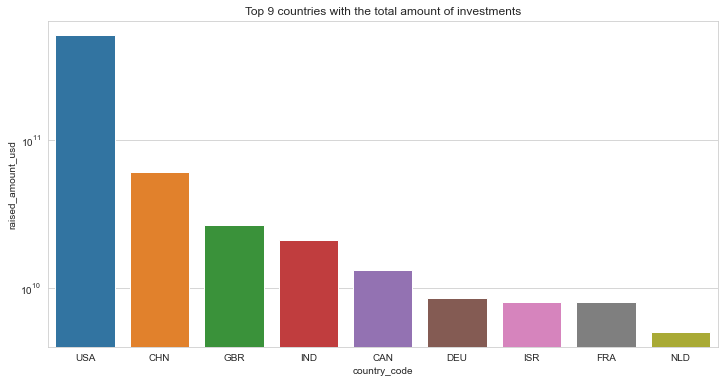

In [142]:
# plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=dftop9.index, y=dftop9, estimator=np.sum)
# log scale to visualise neatly
plt.yscale('log')
plt.title("Top 9 countries with the total amount of investments")
plt.show()

> 3. A plot showing the number of investments in the __top 3 sectors__ of the __top 3 countries__ on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

>> From above analysis for top 3 sectors based on number of investements we have below sectors respective to each Country.
>>> D1 top 3 sectors based on number of investments = ["Others", "Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising"]

>>> D2 top 3 sectors based on number of investments = ["Others", "Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising"]

>>> D3 top 3 sectors based on number of investments = ["Others", "News, Search and Messaging", "Social, Finance, Analytics, Advertising"]

In [143]:
# concetenate 3 contries data frames(D1, D2, D3) into one data frame with top 3 sectors in each country and draw the graph
D1_top3_sectors = ["Others", "Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising"]
D2_top3_sectors = ["Others", "Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising"]
D3_top3_sectors = ["Others", "News, Search and Messaging", "Social, Finance, Analytics, Advertising"]
D1 = D1[D1.main_sector.isin(D1_top3_sectors)]
D2 = D2[D2.main_sector.isin(D2_top3_sectors)]
D3 = D3[D3.main_sector.isin(D3_top3_sectors)]

In [144]:
# concatenate top 3 countries data frames
top3_sectors_countries = pd.concat([D1,D2,D3])
top3_sectors_countries

,company_permalink,funding_round_type,raised_amount_usd,category_list,country_code,main_sector
8,/organization/1-800-publicrelations-inc-,private_equity,6000000.0,Internet Marketing,USA,"Social, Finance, Analytics, Advertising"
36,/organization/128-technology,venture,11999347.0,Service Providers,USA,Others
53,/organization/170-systems,venture,14000000.0,Software,USA,Others
56,/organization/17zuoye,venture,5000000.0,Education,USA,Others
57,/organization/17zuoye,venture,10000000.0,Education,USA,Others
...,...,...,...,...,...,...
55443,/organization/wooplr,venture,5000000.0,Curated Web,IND,"News, Search and Messaging"
56165,/organization/yepme-com,venture,12700000.0,Brand Marketing,IND,"Social, Finance, Analytics, Advertising"
56834,/organization/zinka-logistics,venture,6000000.0,Internet,IND,"News, Search and Messaging"
56914,/organization/zo-rooms,venture,15000000.0,Hospitality,IND,Others


In [145]:
# check for any null values
top3_sectors_countries.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
category_list         0
country_code          0
main_sector           0
dtype: int64

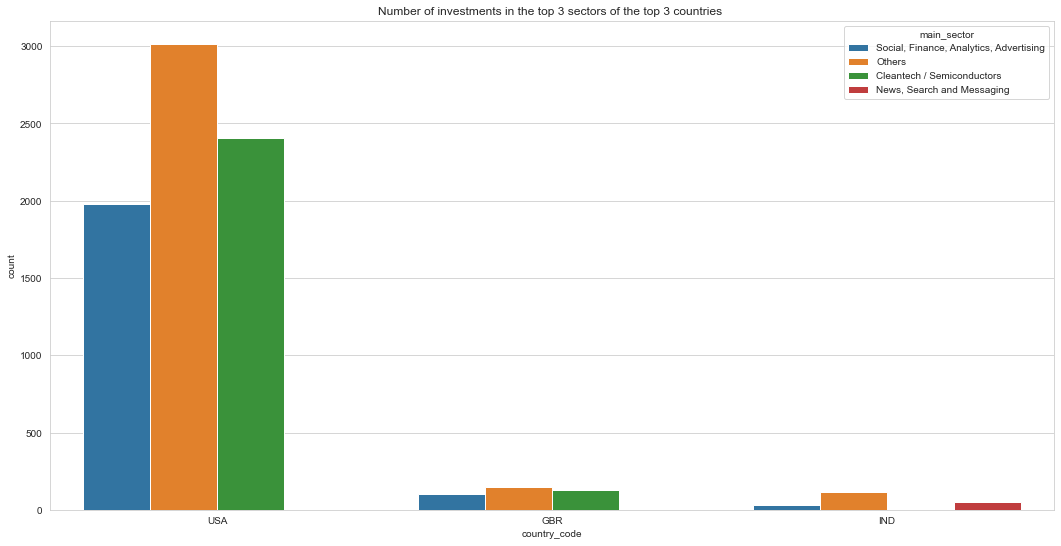

In [146]:
# now plot a graph
plt.figure(figsize=(18, 9))
sns.countplot(x='country_code', hue='main_sector', data=top3_sectors_countries)
# log scale to visualise neatly
plt.title("Number of investments in the top 3 sectors of the top 3 countries ")
plt.show()